In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
import xgboost as xgb
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score


# input file path
datasetdir = "D://indivdual_models//Dataset//2022_MC9K_single_drug"
resultdir = "D://indivdual_models//Result//Model_generation//2022_MC9K_single_drug"

In [2]:
drug_list = ["AEW541","Nilotinib","17-AAG","PHA-665752","Lapatinib","Nutlin-3"
            ,"AZD0530","PF2341066","L-685458","ZD-6474","Panobinostat","Sorafenib"
            ,"Irinotecan","Topotecan","LBW242","PD-0325901","PD-0332991","Paclitaxel"
            ,"PLX4720","RAF265","TAE684","TKI258","Erlotinib","AZD6244"]

Starttime: 20221007
AEW541_//n
train_X shape: (303, 21213)
303 train samples
75 test samples
StartTime : 2022-10-07 15:56:36.006470
EndTime : 2022-10-07 15:56:45.297228
AEW541’s final rmse value is = 0.940682
AEW541 R-squared value is = -0.206815
Nilotinib_//n
train_X shape: (248, 21213)
248 train samples
61 test samples
StartTime : 2022-10-07 15:56:45.570333
EndTime : 2022-10-07 15:56:51.576537
Nilotinib’s final rmse value is = 0.771589
Nilotinib R-squared value is = 0.389303
17-AAG_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2022-10-07 15:56:51.757988
EndTime : 2022-10-07 15:56:58.810508
17-AAG’s final rmse value is = 1.934018
17-AAG R-squared value is = -0.277394
PHA-665752_//n
train_X shape: (302, 21213)
302 train samples
75 test samples
StartTime : 2022-10-07 15:56:59.003754
EndTime : 2022-10-07 15:57:07.508923
PHA-665752’s final rmse value is = 0.322585
PHA-665752 R-squared value is = 0.146019
Lapatinib_//n
train_X shape: (303, 21213)
303 train s

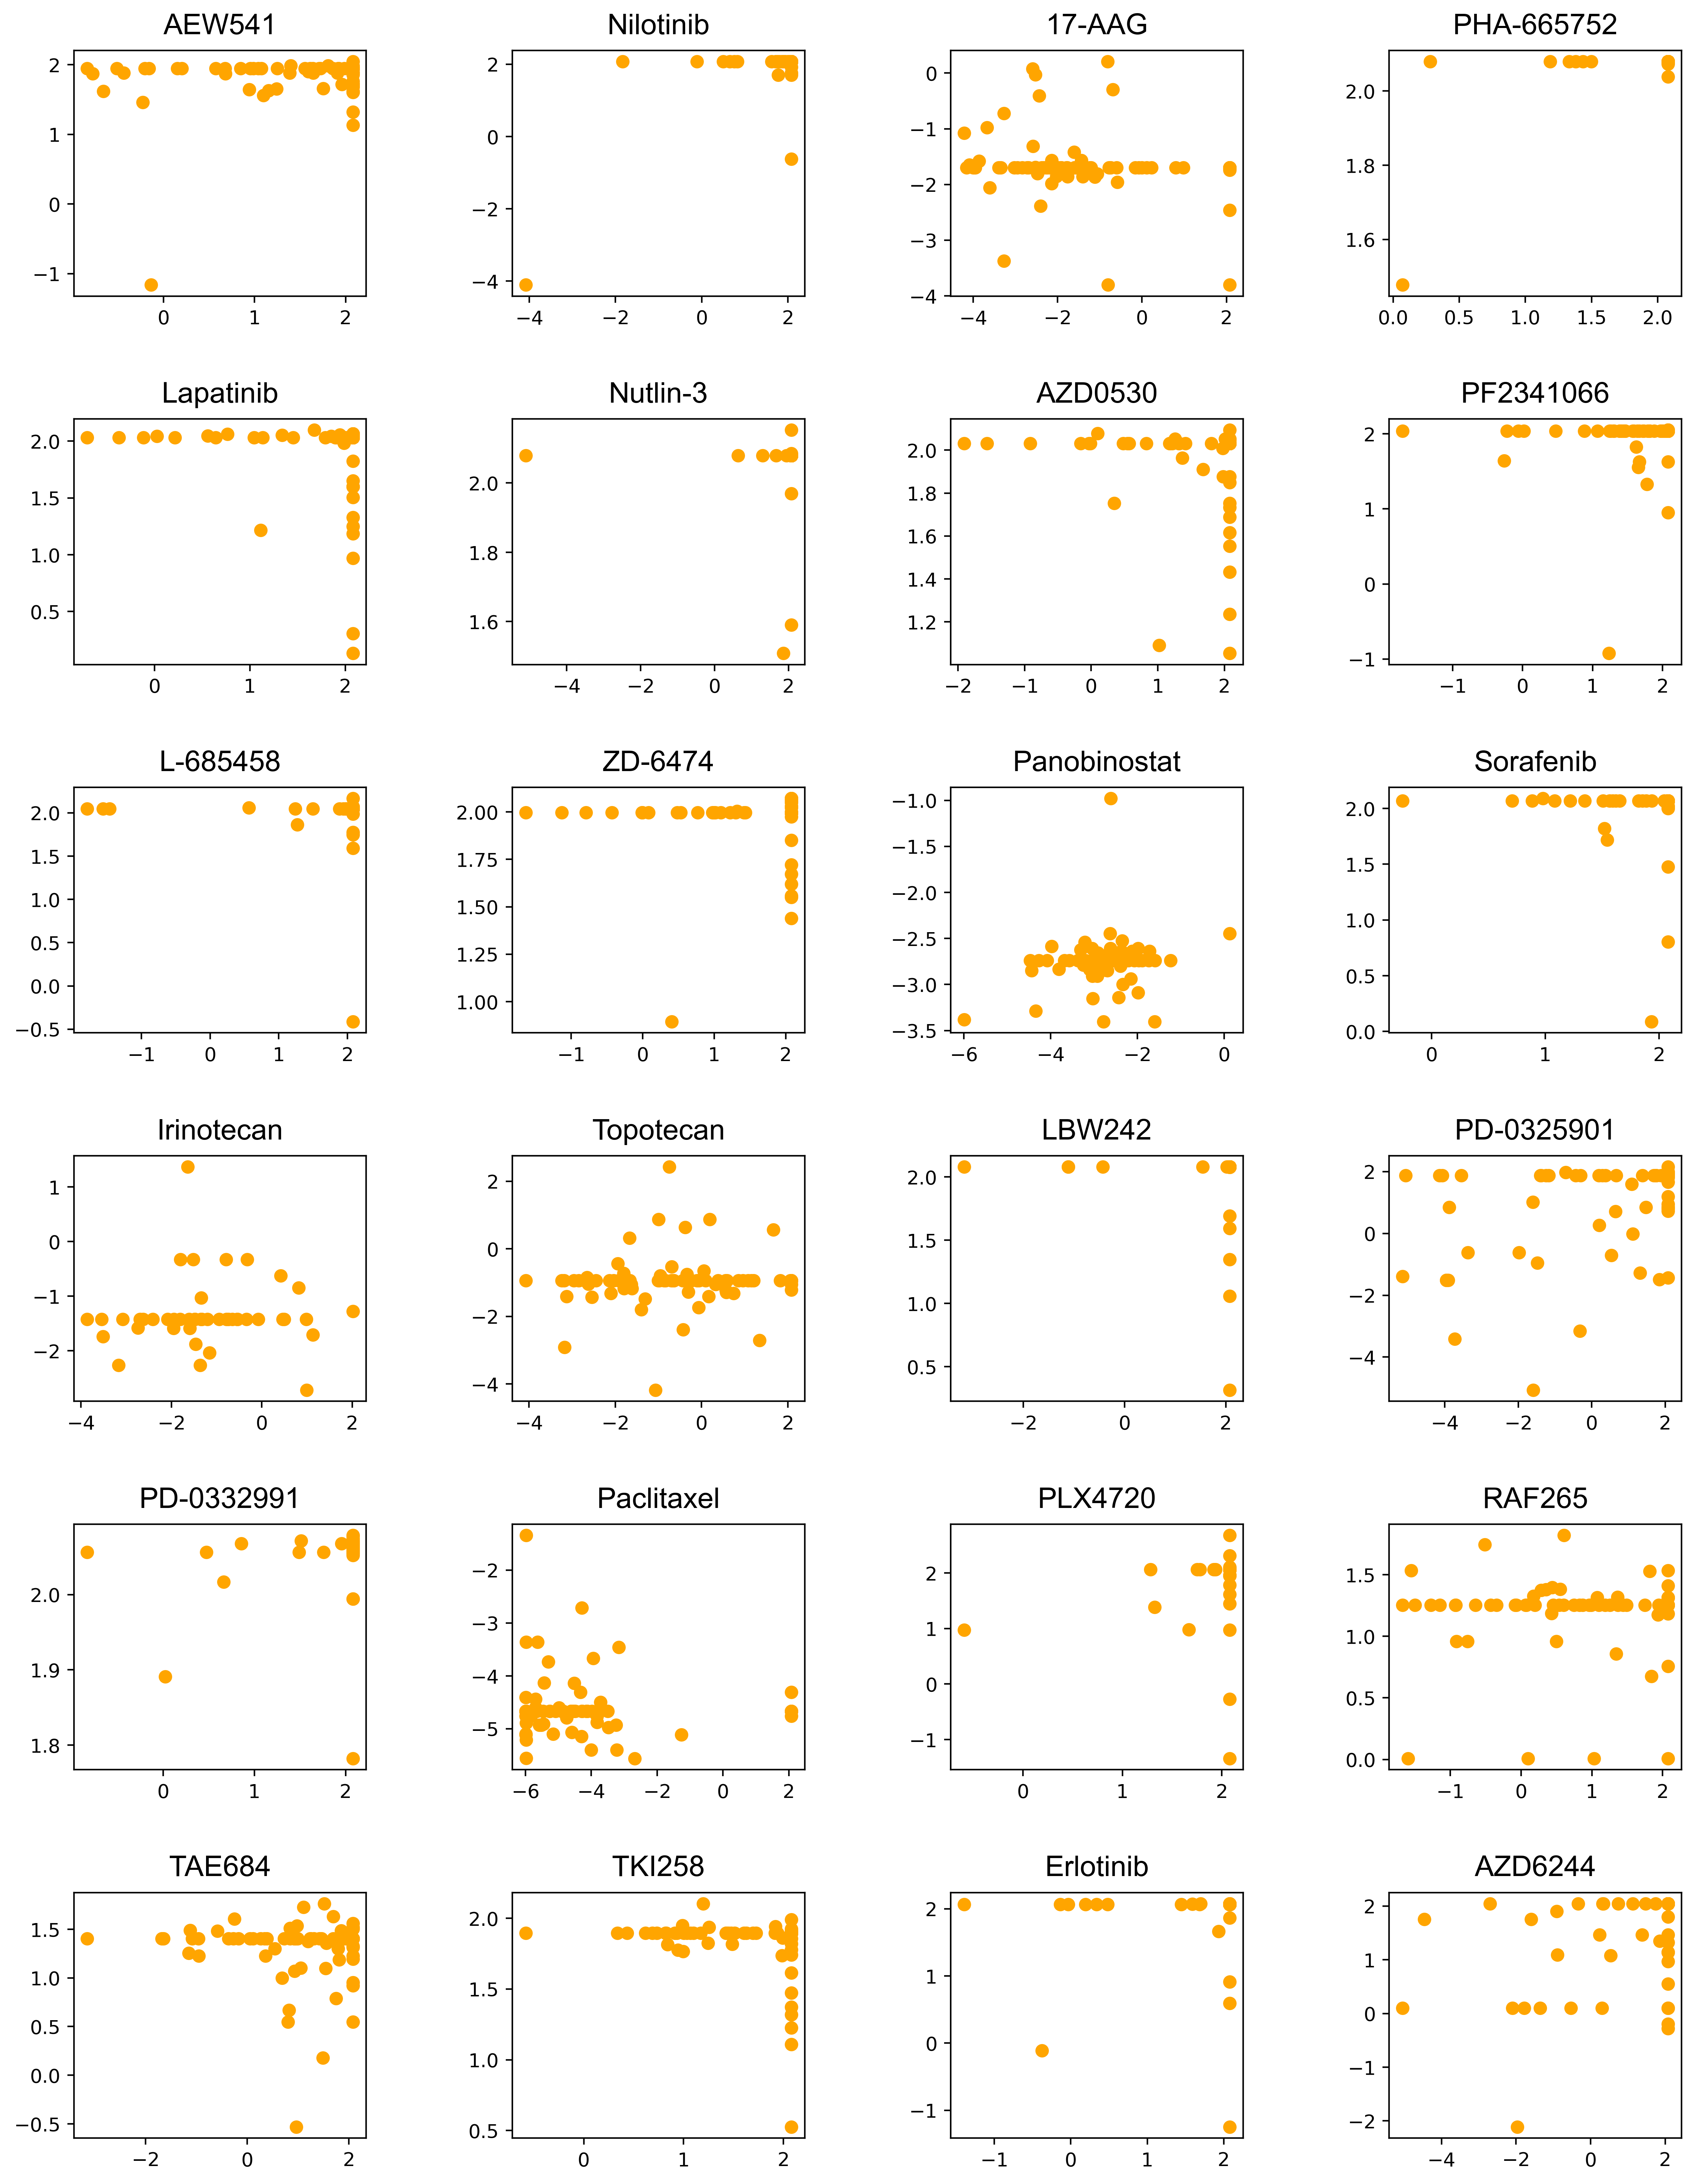

In [3]:
from datetime import datetime
now = datetime.now()
day = now.strftime("%Y%m%d")
print("Starttime: " + day)

rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1
for dname in drug_list:
    
    print('%s_//n' % dname)
    # read input file and index file for training and test set
    dataset = np.load(datasetdir + "//MC9K_%s.npz" % dname)
    ss0 = np.load(datasetdir + '//MC9K_%s_0_8_2.npz' % dname)

    # input and index file assign
    x = dataset['x']
    y = dataset['y']
    # y_linear = dataset['y_lnIC50']
    ss0_train = ss0['train']
    ss0_test = ss0['test']
    
    # training and test dataset assign
    train_X, train_y = x[ss0_train], y[ss0_train]
    test_X, test_y = x[ss0_test], y[ss0_test]

    # data typing and the number of dataset
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    # train_X /= 255
    # test_X /= 255
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # model fitting
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    model = xgb.XGBRegressor()
    model.fit(train_X,train_y)
    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)


    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
    
    import pickle
    import joblib
    joblib.dump(model, resultdir + '//XGBoost//MC9K_XGB_%s.pkl' % dname) 
            
    
    # saving predicted ln(IC50)s and ln(IC50)s in the test set
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    c.to_csv(resultdir + '//XGBoost//predicted_table//MC9K_Ridge_%s_pred_and_val_result.csv' % dname, index=False)


    # RMSE
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    
    # R-squared value
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num)
    plt.scatter(test_y,predicted_value,c='orange')
    plt.title(dname,fontdict ={'fontsize' : 15},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    

figdir = "D://indivdual_models//Result//Figure"
plt.savefig(figdir +'//MC9K_single_drug_XGB_plot.png', dpi=400)

In [4]:
num

25

In [5]:
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

In [6]:
result

,Drug,RMSE,R2value
0,AEW541,0.940682,-0.206815
1,Nilotinib,0.771589,0.389303
2,17-AAG,1.934018,-0.277394
3,PHA-665752,0.322585,0.146019
4,Lapatinib,0.779409,-0.499602
5,Nutlin-3,0.856269,-0.032256
6,AZD0530,0.981936,-0.250961
7,PF2341066,0.807778,-0.418007
8,L-685458,0.830453,-0.212095
9,ZD-6474,0.925750,-0.174517


In [7]:
result.to_csv(resultdir +'//MC9K_XGB_24drugs_metrics.csv', index=False)